In [7]:
#13 model
import keras
from keras.models import Sequential
from keras.layers import Dense 


from keras.models import Sequential
from keras.layers import Convolution2D 
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

classifier = Sequential()

classifier.add(Convolution2D(64, 9, 9, input_shape = (64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Convolution2D(32, 6, 6, input_shape = (64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Convolution2D(16, 3, 3, input_shape = (64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu' ))
classifier.add(Dense(units = 2, activation = 'softmax'))

classifier.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (9, 9), input_shape=(64, 64, 3..., activation="relu")`
  from ipykernel import kernelapp as app
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (6, 6), input_shape=(64, 64, 3..., activation="relu")`
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(64, 64, 3..., activation="relu")`


In [8]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 56, 56, 64)        15616     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 32)        73760     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 16)         

In [9]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
from keras.preprocessing.image import ImageDataGenerator 

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = .2, zoom_range = .2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set', target_size = (64, 64), batch_size = 32, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('dataset/test_set', target_size = (64, 64), batch_size = 32, class_mode = 'categorical')

classifier.fit_generator(training_set, steps_per_epoch = int(20+31/32), epochs = 10, validation_data = test_set, validation_steps = int(78+124/32))


Found 202 images belonging to 2 classes.
Found 51 images belonging to 2 classes.
Epoch 1/10
20/20 [==============================] - 22s 1s/step - loss: 0.6618 - accuracy: 0.6150 - val_loss: 0.6850 - val_accuracy: 0.6076
Epoch 2/10
20/20 [==============================] - 21s 1s/step - loss: 0.6352 - accuracy: 0.6185 - val_loss: 0.6465 - val_accuracy: 0.6081
Epoch 3/10
20/20 [==============================] - 21s 1s/step - loss: 0.6431 - accuracy: 0.6045 - val_loss: 0.6232 - val_accuracy: 0.6086
Epoch 4/10
20/20 [==============================] - 21s 1s/step - loss: 0.6334 - accuracy: 0.6254 - val_loss: 0.6615 - val_accuracy: 0.6469
Epoch 5/10
20/20 [==============================] - 21s 1s/step - loss: 0.6511 - accuracy: 0.6326 - val_loss: 0.6174 - val_accuracy: 0.6081
Epoch 6/10
20/20 [==============================] - 21s 1s/step - loss: 0.6089 - accuracy: 0.6202 - val_loss: 0.5792 - val_accuracy: 0.8028
Epoch 7/10
20/20 [==============================] - 21s 1s/step - loss: 0.6113 

In [19]:
import glob
normal_cases_dir = r'dataset/test_set/no'
idc_cases_dir = r'dataset/test_set/yes'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2
import keras

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64,64)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)

In [20]:
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

Total number of test examples:  (51, 64, 64, 3)
Total number of labels: (51, 2)


In [21]:
test_loss, test_score = classifier.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = classifier.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)

51/51 [==============================] - 0s 3ms/step
Loss on test set:  0.4326406045287263
Accuracy on test set:  0.9215686321258545
(51,)
(51,)


In [22]:
cm

array([[19,  1],
       [ 3, 28]], dtype=int64)

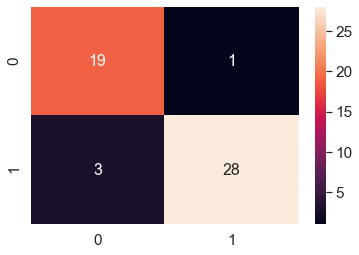

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()